# Simple Algorithm Analysis Example

First we will simulate some fictional fitness data from a run of our algorithm

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

np.random.seed(10)

In [2]:
gens = 100
t = np.arange(gens)

In [3]:
mean_fitnesses1 = np.random.exponential(scale=1.0, size=gens)
mean_fitnesses1.sort()
mean_fitnesses2 = np.random.exponential(scale=2.5, size=gens)
mean_fitnesses2.sort()

In [4]:
std1 = [random.uniform(0.75,1.0) for x in range(gens)]
std2 = [random.uniform(0.9,1.2) for x in range(gens)]

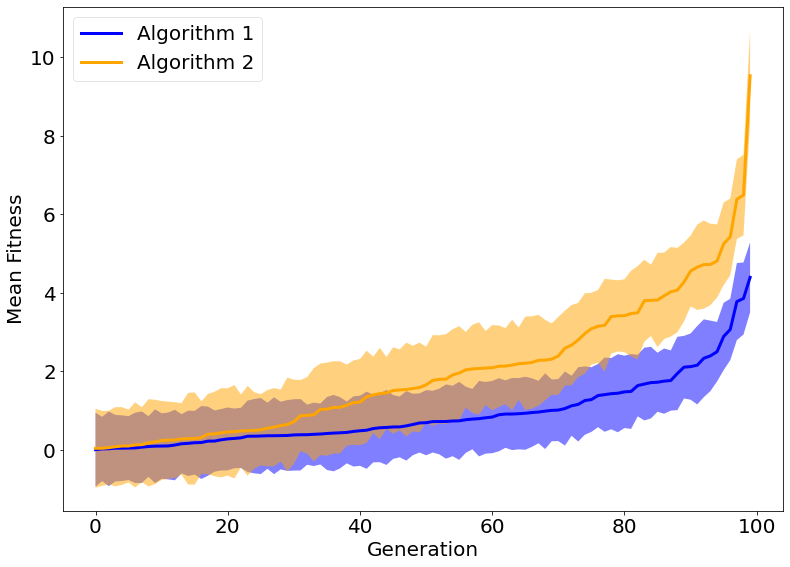

In [5]:
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xlabel('Generation')
ax.set_ylabel('Mean Fitness')
ax.plot(t, mean_fitnesses1, lw=3, label='Algorithm 1', color='blue')
ax.fill_between(t, mean_fitnesses1+std1, mean_fitnesses1-std1, facecolor='blue', alpha=0.5)
ax.plot(t, mean_fitnesses2, lw=3, label='Algorithm 2', color='orange')
ax.fill_between(t, mean_fitnesses2+std2, mean_fitnesses2-std2, facecolor='orange', alpha=0.5)
ax.legend(loc='best', fancybox=True, framealpha=0.5)

[100.73283009 111.73732413 118.62951667  80.16363502 111.5668893
 106.09282266  96.76798768 106.64145607 103.96725993  94.23883139
 114.88218392 101.40246867 111.88316754  97.54254612  83.64413382
 102.44798089  97.6491777   87.39172194  83.08032071 106.16450922]
[100.73283009 111.73732413 118.62951667  80.16363502 111.5668893
 106.09282266  96.76798768 106.64145607 103.96725993  94.23883139
 114.88218392 101.40246867 111.88316754  97.54254612  83.64413382
 102.44798089  97.6491777   87.39172194  83.08032071 106.16450922]


/Users/jpurdy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


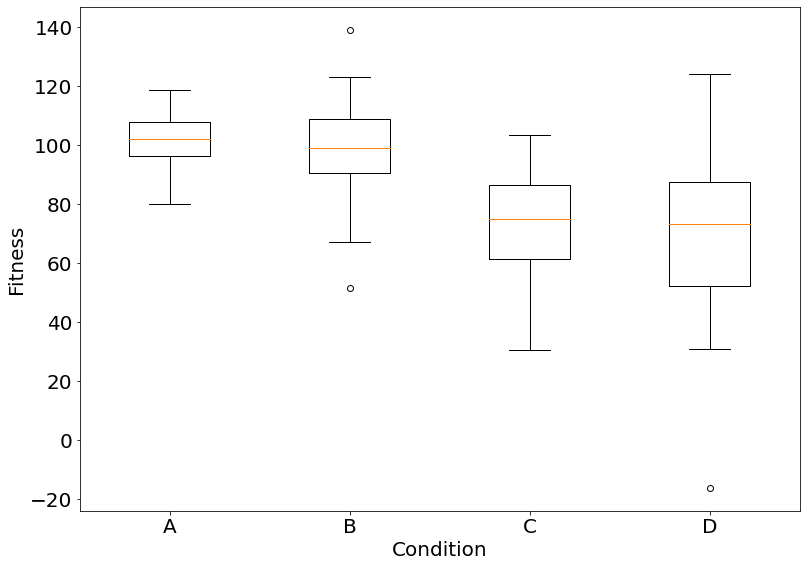

In [16]:
data_A = np.random.normal(100, 10, 20)
data_B = np.random.normal(95, 20, 20) 
data_C = np.random.normal(70, 40, 20)
data_D = np.random.normal(80, 30, 20) 

data = [data_A, data_B, data_C, data_D] 

fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xticklabels(['A', 'B','C', 'D']) 

ax.set_xlabel('Condition')
ax.set_ylabel('Fitness')

bp = ax.boxplot(data)

Let's test for a difference between group A and group B

In [7]:
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data_A), np.std(data_A)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data_B), np.std(data_B)))

data1: mean=101.818 stdv=8.164
data2: mean=91.930 stdv=18.784


The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The two samples are combined and rank ordered together. The strategy is to determine if the values from the two samples are randomly mixed in the rank ordering or if they are clustered at opposite ends when combined. A random rank order would mean that the two samples are not different, while a cluster of one sample values would indicate a difference between them.

Normally, for the test to be effective, it requires at least 20 observations in each data sample.

In [8]:
from scipy.stats import mannwhitneyu

In [9]:
stat, p = mannwhitneyu(data_A, data_B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=130.000, p=0.030


The p-value is the probability that you draw an equal or more extreme value, therefore the pValue cannot be exactly zero but "p = 0.000" must be understood as p < 0.000

The U value: pick one value from group A and also pick a value from group B. Record which group has the larger value. Repeat for all values in the two groups.  Total up the number of times that the value in A is larger than B, and the number of times the value in B is larger than the value in A. The smaller of these two values is U. So if U = 0 then all values in one group are larger than all values in another. Basically, the smaller the U value, the more different th groups, but the value of U will be related to sample size.

In [10]:
print('Difference in means (A<->B): ' + str(np.mean(data_A) - np.mean(data_B)) )

Difference in means (A<->B): 9.887786372860518


In [11]:
def shuffle_between_lists(list_A, list_B):
    list_both = list(list_A) + list(list_B)
    random.shuffle(list_both)
    list_A, list_B = list_both[:len(list_A)], list_both[len(list_A):]
    return(list_A, list_B)

Record the group differences between randomized swaps between the groups

In [12]:
iterations = 9999
diffs = [0] * iterations
for i in range(iterations):
    list_A, list_B = shuffle_between_lists(data_A, data_B)
    meanA = sum(list_A) / len(list_A)
    meanB = sum(list_B) / len(list_B)
    diffs[i] = abs(meanA - meanB)

Count the number of times the difference is <= than our actual difference (one-tailed test)

In [13]:
actual_diff = abs(np.mean(data_A) - np.mean(data_B))
counter = 0
for i in range(iterations):
    if diffs[i] >= actual_diff:
        counter += 1

In [14]:
p = (counter + 1) / (iterations + 1)
print(p)

0.0408
